In [1]:
# import libraries for machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
# Load the data
data = pd.read_csv('alzheimers_disease_data.csv')

# Display the first 5 rows of the data
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
# Drop Patient ID column and Doctor's name column
data = data.drop(['PatientID', 'DoctorInCharge'], axis=1)

In [4]:
# Separate features and target variable
x = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [6]:
# Select the top k features
k = 15  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

# Get the selected feature names
selected_features = x.columns[selector.get_support()]

print(f"Selected Features ({k}): {selected_features}")

Selected Features (15): Index(['EducationLevel', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL'],
      dtype='object')


In [7]:
# Define the parameter grids for GridSearchCV
param_grids = {
    "LogisticRegression": {
        "C": [0.1, 1, 10],
        "solver": ['liblinear']
    },
    "SVM": {
        "C": [0.1, 1],
        "gamma": [0.1, 0.01],
        "kernel": ['rbf']
    },
    "KNN": {
        "n_neighbors": [3, 5],
        "weights": ['uniform', 'distance']
    },
    "GradientBoosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.1, 0.2],
        "max_depth": [3, 4]
    },
    "RandomForest": {
        "n_estimators": [100, 200],
        "max_depth": [10, 20],
        "min_samples_split": [2, 5]
    }
}

In [8]:
# Define the models to be tested
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier()
}

Performing GridSearchCV for LogisticRegression...
Best Parameters for LogisticRegression: {'C': 10, 'solver': 'liblinear'}
Model: LogisticRegression
Accuracy: 0.8395348837209302
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       277
           1       0.80      0.73      0.76       153

    accuracy                           0.84       430
   macro avg       0.83      0.81      0.82       430
weighted avg       0.84      0.84      0.84       430



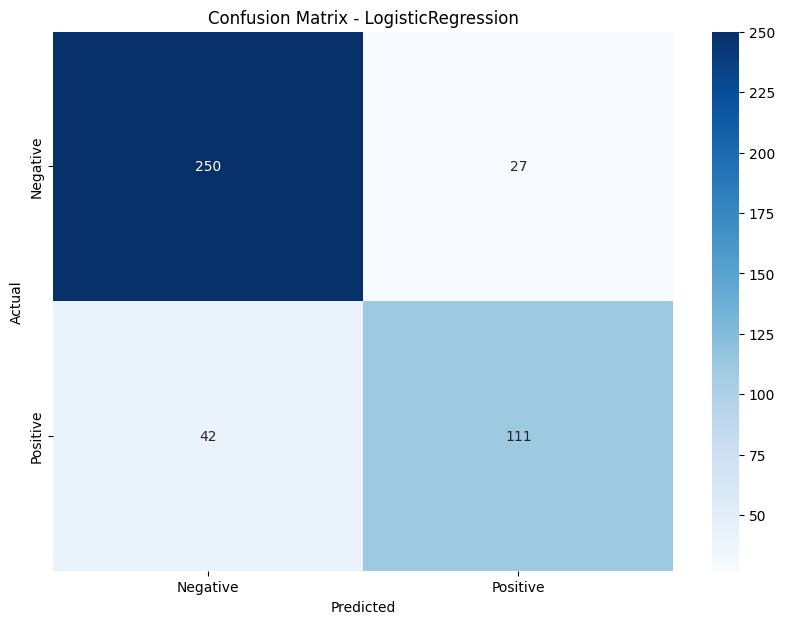

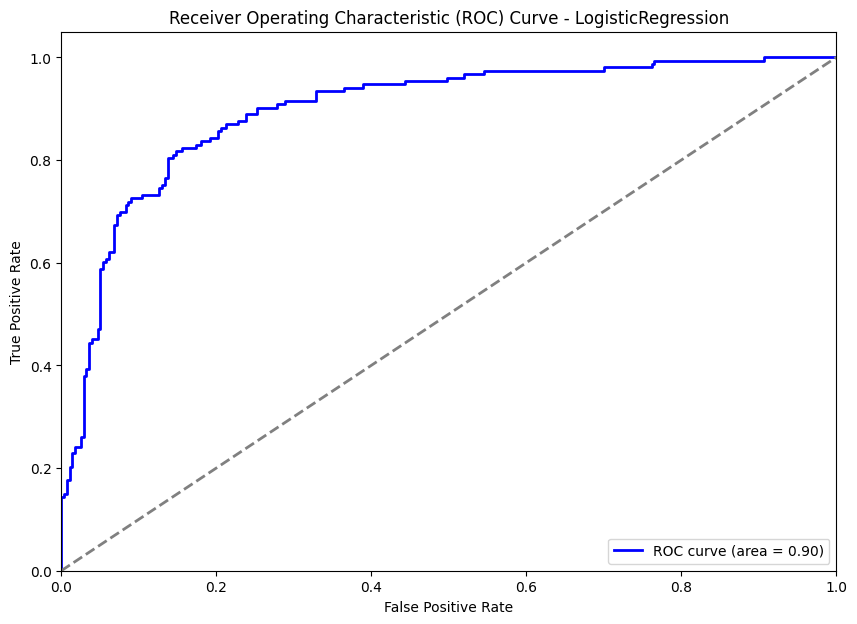

Performing GridSearchCV for SVM...
Best Parameters for SVM: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Model: SVC
Accuracy: 0.6441860465116279
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       277
           1       0.00      0.00      0.00       153

    accuracy                           0.64       430
   macro avg       0.32      0.50      0.39       430
weighted avg       0.41      0.64      0.50       430



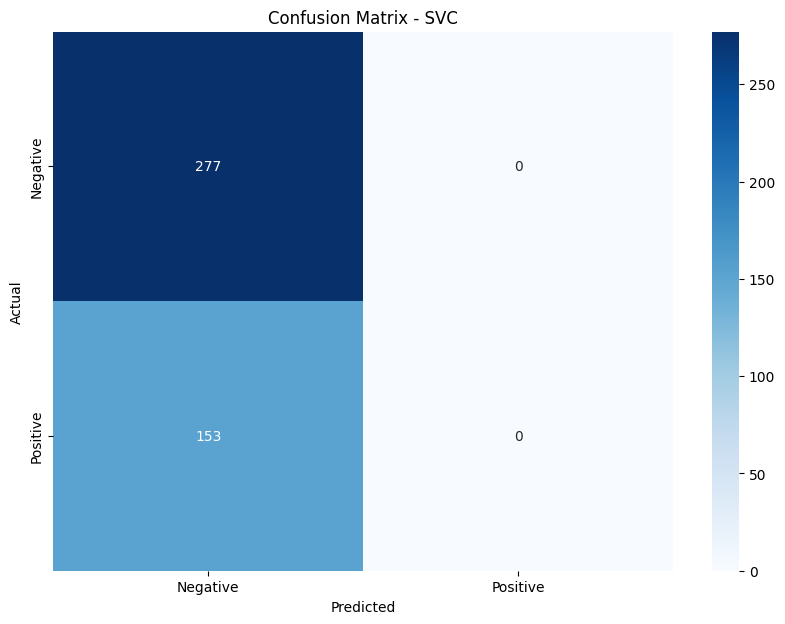

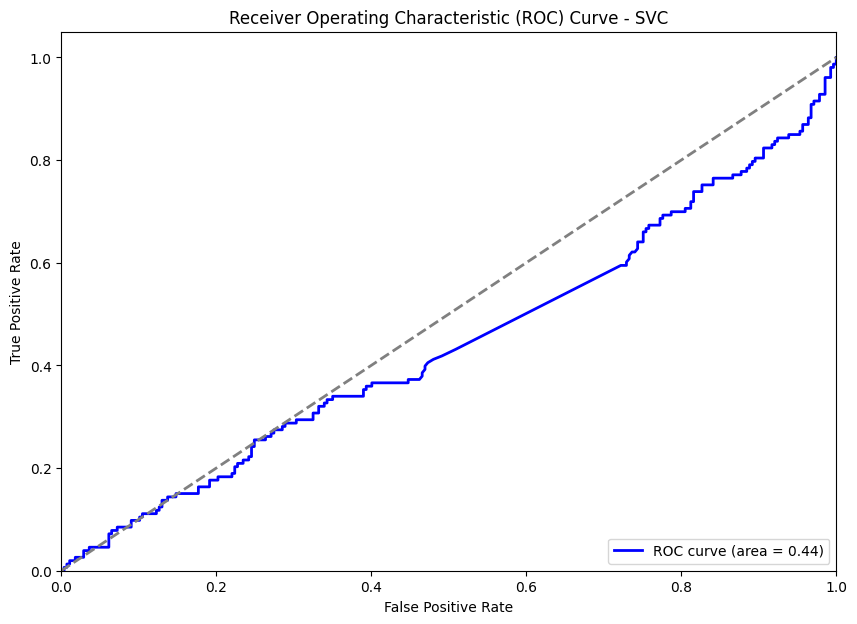

Performing GridSearchCV for KNN...
Best Parameters for KNN: {'n_neighbors': 5, 'weights': 'uniform'}
Model: KNeighborsClassifier
Accuracy: 0.6232558139534884
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73       277
           1       0.46      0.34      0.39       153

    accuracy                           0.62       430
   macro avg       0.57      0.56      0.56       430
weighted avg       0.60      0.62      0.61       430



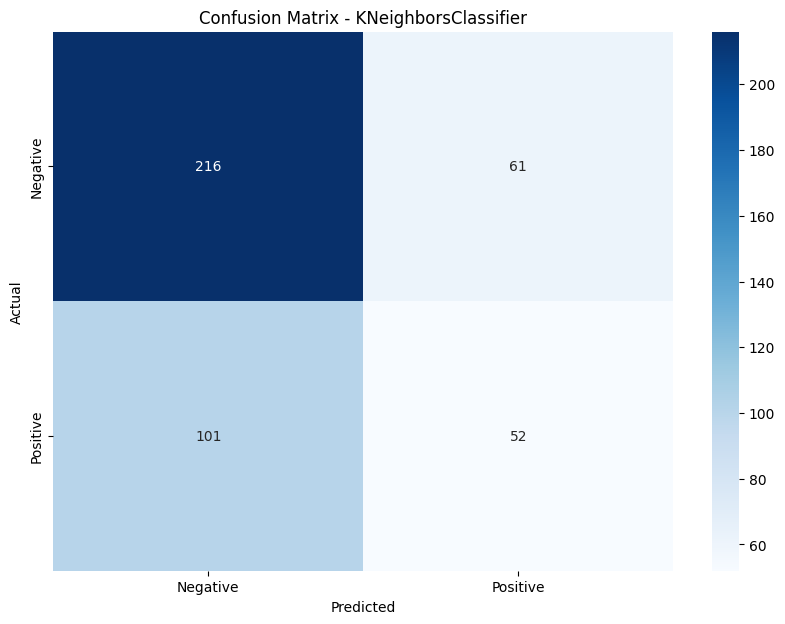

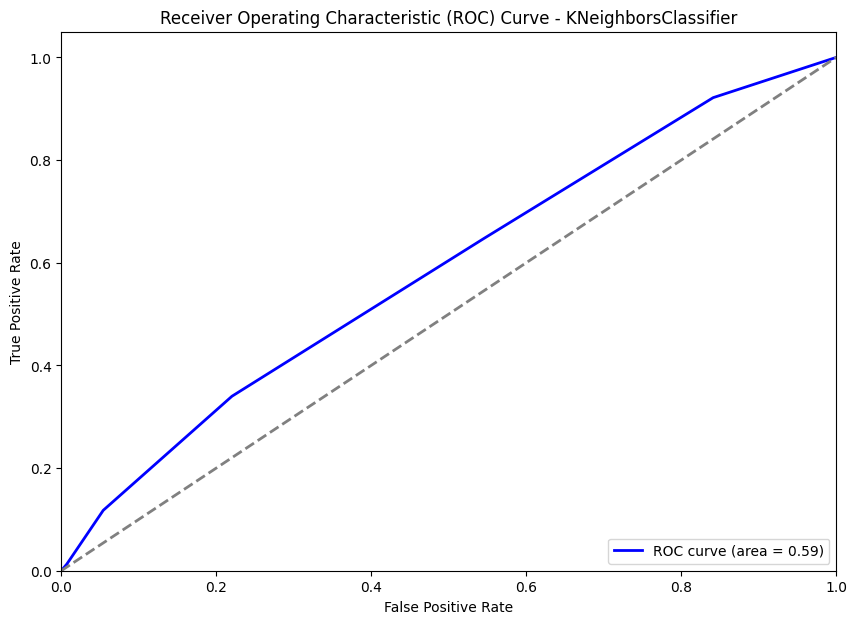

Performing GridSearchCV for GradientBoosting...
Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Model: GradientBoostingClassifier
Accuracy: 0.9441860465116279
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       277
           1       0.93      0.92      0.92       153

    accuracy                           0.94       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.94      0.94      0.94       430



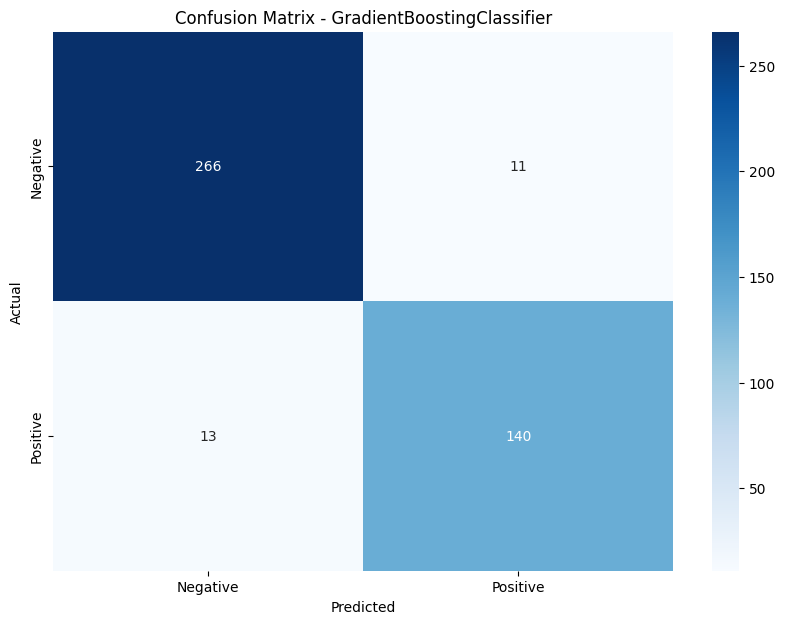

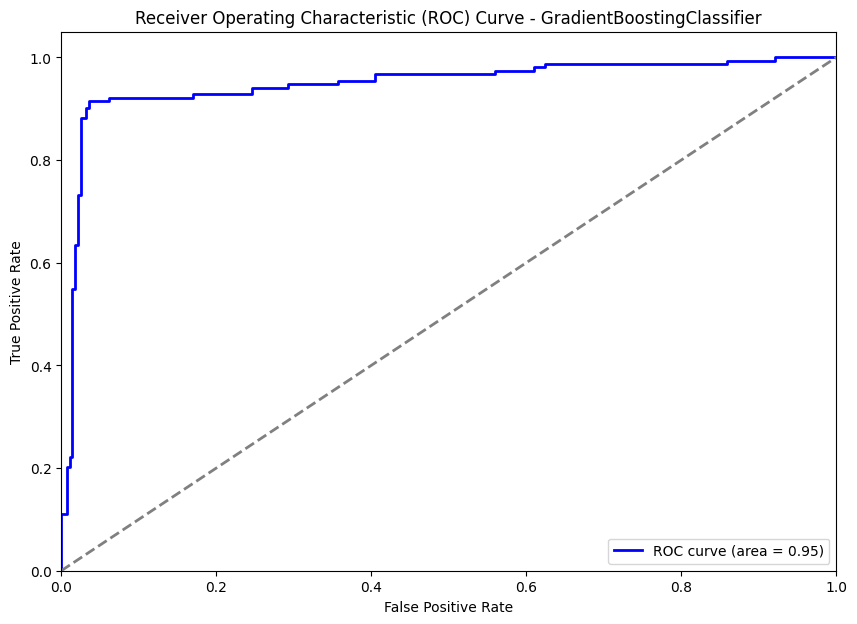

Performing GridSearchCV for RandomForest...
Best Parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Model: RandomForestClassifier
Accuracy: 0.9441860465116279
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       277
           1       0.96      0.88      0.92       153

    accuracy                           0.94       430
   macro avg       0.95      0.93      0.94       430
weighted avg       0.95      0.94      0.94       430



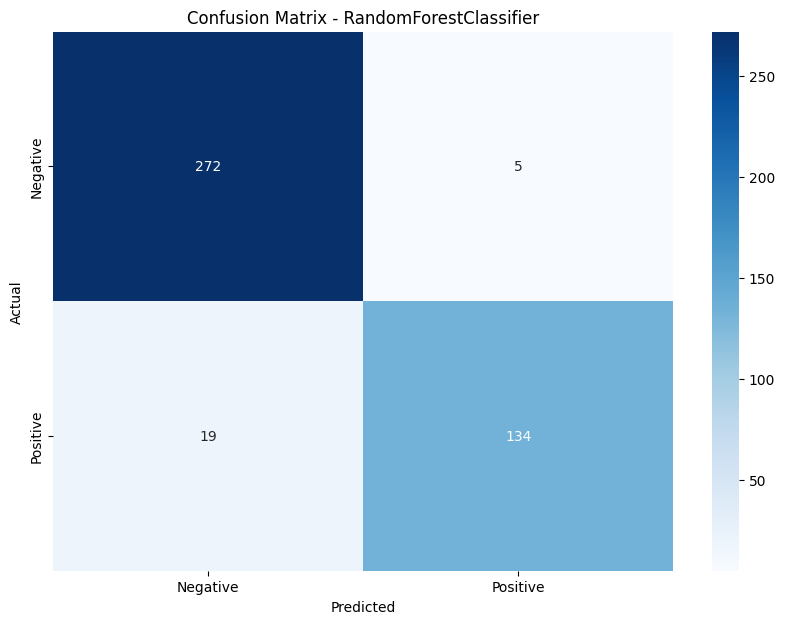

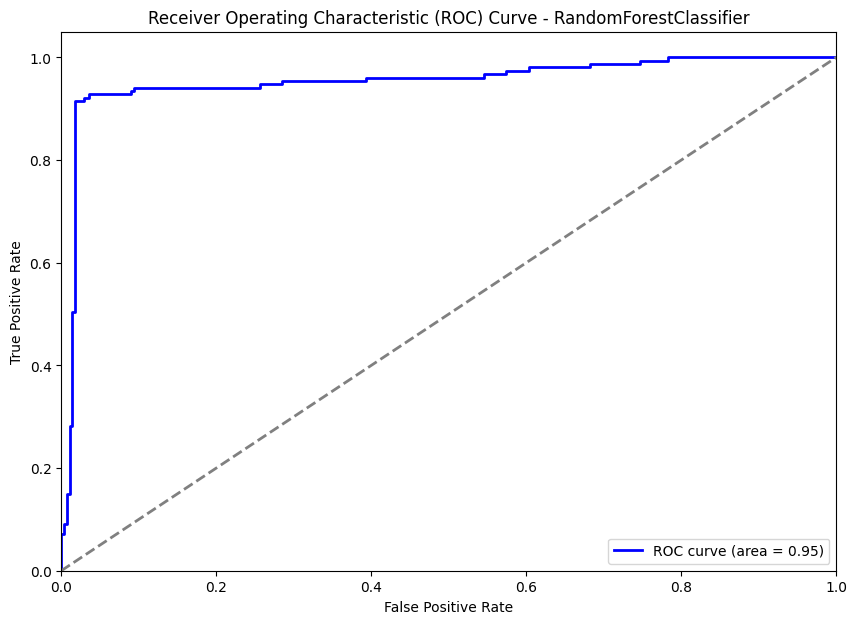


Best Model: GradientBoosting with Accuracy: 0.9441860465116279
Best model and feature selector saved as 'best_model.pkl' and 'feature_selector.pkl'


In [9]:
# Function to evaluate and plot results for each model
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    # Accuracy and Classification Report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()
    
    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()
    
    return accuracy

# Perform GridSearchCV and evaluate each model
best_accuracy = 0
best_model_name = None
best_model = None

for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    grid = GridSearchCV(model, param_grids[model_name], cv=5)
    grid.fit(x_train_selected, y_train)
    
    # Print the best parameters found by GridSearchCV
    print(f"Best Parameters for {model_name}:", grid.best_params_)
    
    # Evaluate the model with the best parameters
    best_estimator = grid.best_estimator_
    accuracy = evaluate_model(best_estimator, x_train_selected, x_test_selected, y_train, y_test)
    
    # Update the best model if the current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = best_estimator

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy}")

# Save the best model and the feature selector using joblib
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(selector, 'feature_selector.pkl')

print("Best model and feature selector saved as 'best_model.pkl' and 'feature_selector.pkl'")